# Classification (supervised learning)

The notebook aims to study and implement classification (supervised learning) using "sklearn". The iris dataset will be used to classify.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [318]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


# Importing data

In [319]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [320]:
# Print dataset
print(dataset)


     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width          Flower
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [321]:
# Print dataset shape
print(dataset.shape)


(150, 5)


In [322]:
# Print column names
print(dataset.columns)


Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')


2. Drop rows with any missing values


In [323]:
# Drop na
dataset = dataset.dropna()


3. Encoding the class label categorical column: from string to num


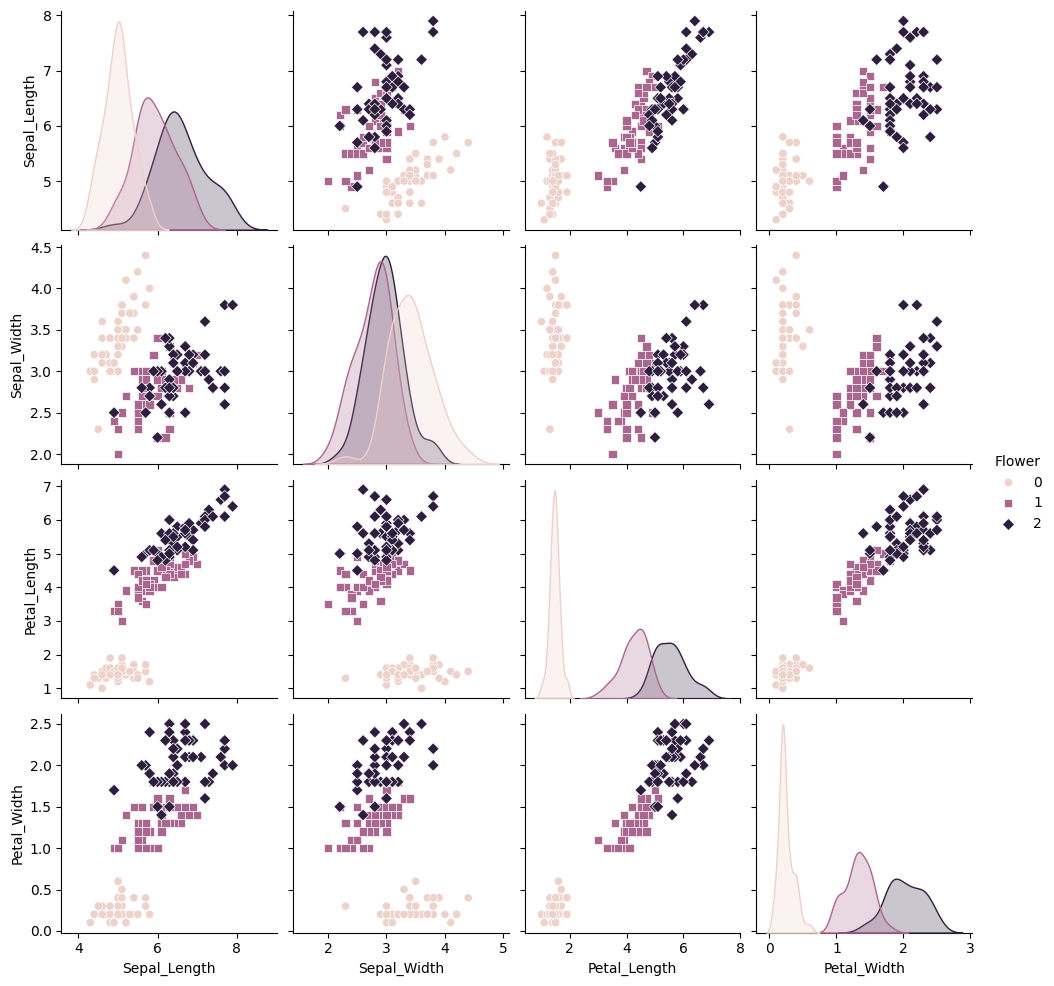

In [324]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset['Flower'] = dataset['Flower'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Visualize the dataset
sns.pairplot(dataset, hue='Flower', markers=["o", "s", "D"])
plt.show()


Now the label/category is numeric


4. Discard columns that won't be used


5. Scatter plot of the data

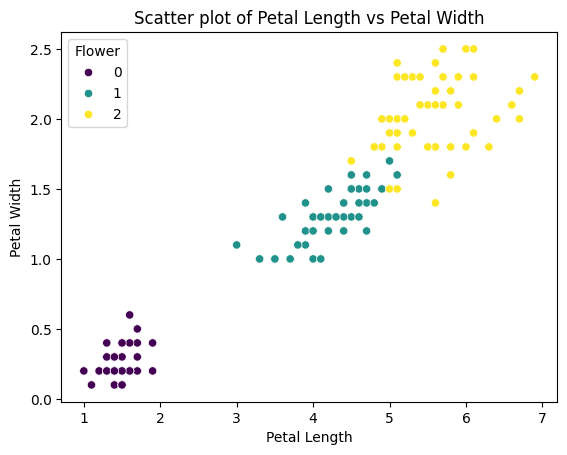

In [325]:
# Scatter plot of Petal_Length vs Petal_Width
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Petal_Width'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()


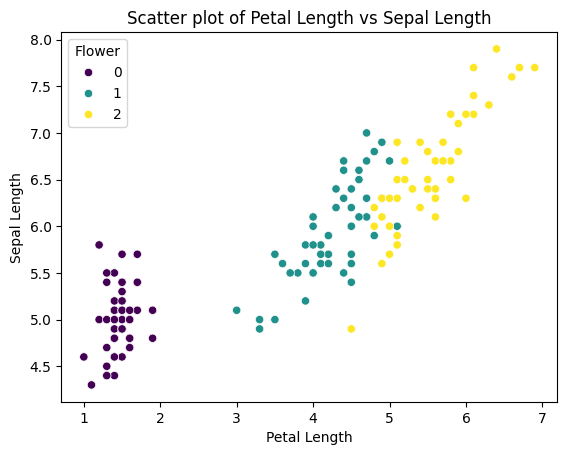

In [326]:
# Scatter plot of Petal_Length vs Sepal_Length
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Sepal_Length'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Scatter plot of Petal Length vs Sepal Length')
plt.show()


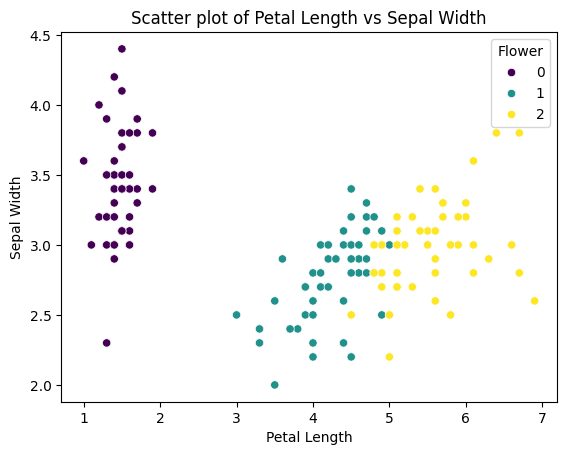

In [327]:
# Scatter plot of Petal_Length vs Sepal_Width
sns.scatterplot(x=dataset['Petal_Length'], y=dataset['Sepal_Width'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Petal Length vs Sepal Width')
plt.show()


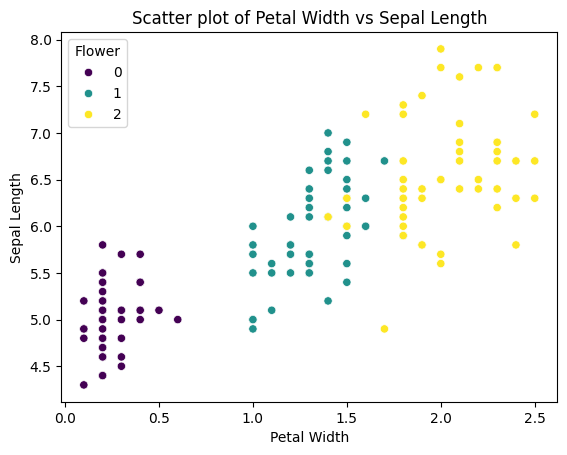

In [328]:
# Scatter plot of Petal_Width vs Sepal_Length
sns.scatterplot(x=dataset['Petal_Width'], y=dataset['Sepal_Length'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Scatter plot of Petal Width vs Sepal Length')
plt.show()


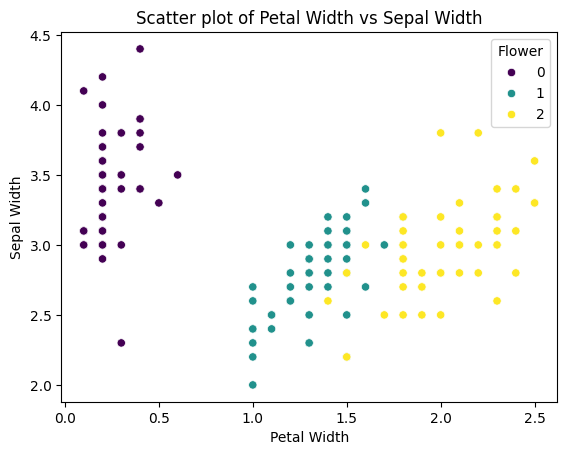

In [329]:
# Scatter plot of Petal_Width vs Sepal_Width
sns.scatterplot(x=dataset['Petal_Width'], y=dataset['Sepal_Width'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Petal Width vs Sepal Width')
plt.show()


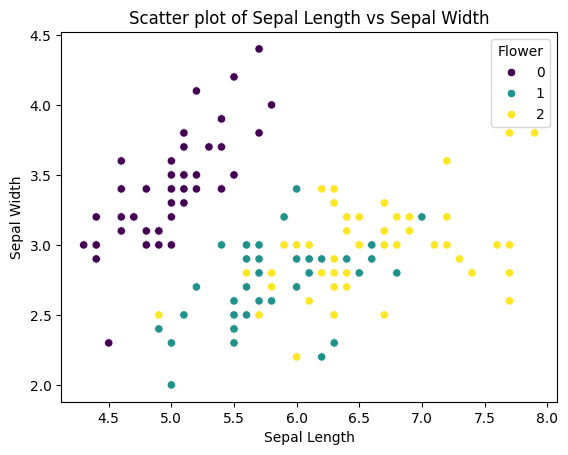

In [330]:
# Scatter plot of Sepal_Length vs Sepal_Width
sns.scatterplot(x=dataset['Sepal_Length'], y=dataset['Sepal_Width'], hue=dataset['Flower'], palette='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()


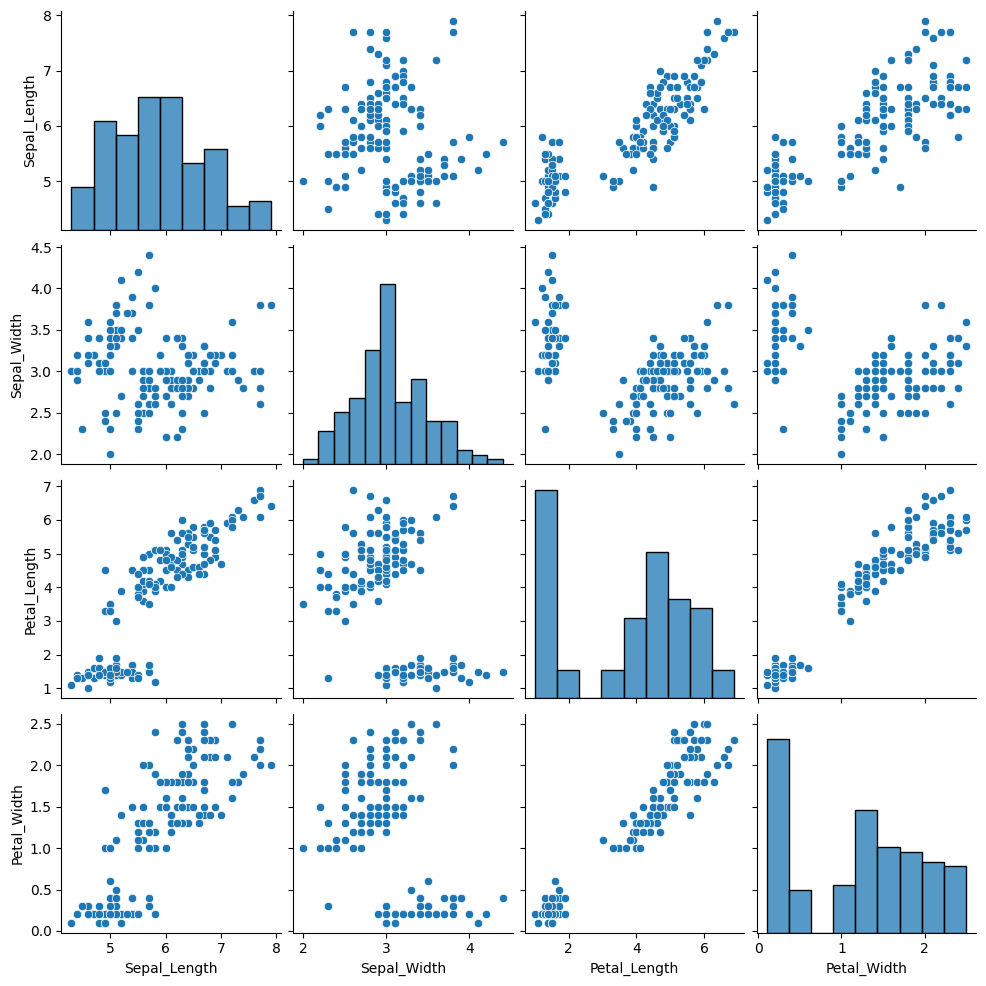

In [331]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop(columns=['Flower']))
plt.show()


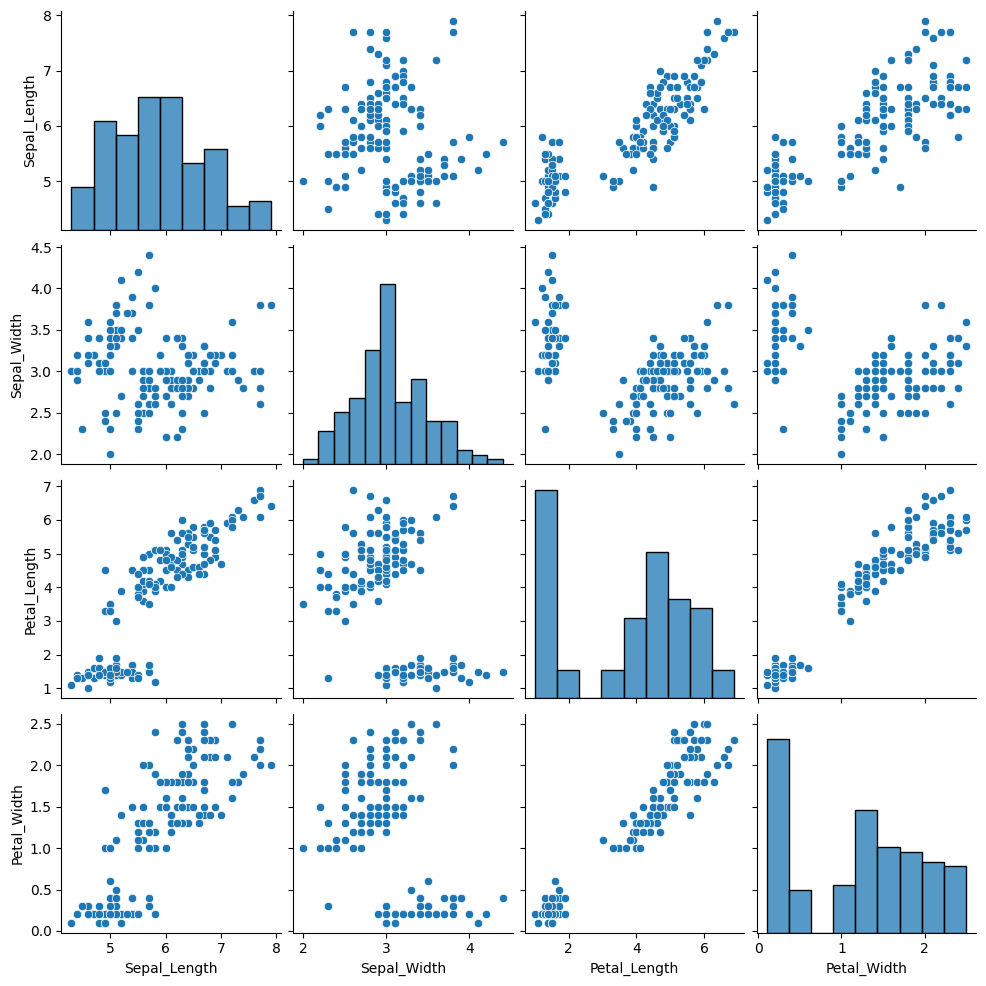

In [332]:
# Pairplot: Scatterplot of all variables (not the flower type)
sns.pairplot(dataset.drop(columns=['Flower']))
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [333]:
# Get dataframes for each real cluster
cluster_0 = dataset[dataset['Flower'] == 0]
cluster_1 = dataset[dataset['Flower'] == 1]
cluster_2 = dataset[dataset['Flower'] == 2]

# Display the first few rows of each cluster
print("Cluster 0:")
print(cluster_0.head())
print("\nCluster 1:")
print(cluster_1.head())
print("\nCluster 2:")
print(cluster_2.head())


Cluster 0:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

Cluster 1:
    Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
50           7.0          3.2           4.7          1.4       1
51           6.4          3.2           4.5          1.5       1
52           6.9          3.1           4.9          1.5       1
53           5.5          2.3           4.0          1.3       1
54           6.5          2.8           4.6          1.5       1

Cluster 2:
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
100           6.3          3.3           6.0          2.5       2
101           5.8          2.7           5.1          1.9  

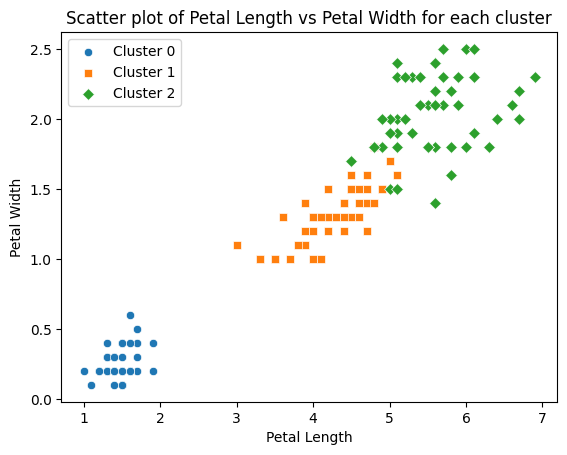

In [334]:
# Scatter plot of each real cluster for Petal

sns.scatterplot(x=cluster_0['Petal_Length'], y=cluster_0['Petal_Width'], label='Cluster 0', marker='o')
sns.scatterplot(x=cluster_1['Petal_Length'], y=cluster_1['Petal_Width'], label='Cluster 1', marker='s')
sns.scatterplot(x=cluster_2['Petal_Length'], y=cluster_2['Petal_Width'], label='Cluster 2', marker='D')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width for each cluster')
plt.legend()
plt.show()


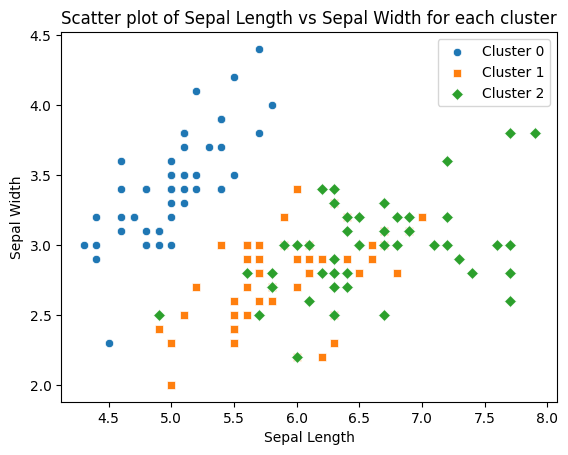

In [335]:
# Scatter plot of each real cluster for Sepal

sns.scatterplot(x=cluster_0['Sepal_Length'], y=cluster_0['Sepal_Width'], label='Cluster 0', marker='o')
sns.scatterplot(x=cluster_1['Sepal_Length'], y=cluster_1['Sepal_Width'], label='Cluster 1', marker='s')
sns.scatterplot(x=cluster_2['Sepal_Length'], y=cluster_2['Sepal_Width'], label='Cluster 2', marker='D')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter plot of Sepal Length vs Sepal Width for each cluster')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Get variables **X** and labels **y**

In [336]:
# Select variables (one, two, three, four)
X  = dataset[["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"]].values
#X  = dataset[["Petal_Length", "Petal_Width"]].values
#X  = dataset[["Sepal_Length", "Sepal_Width"]].values

# Get the class of each observation
y  = dataset["Flower"].values


In [337]:
# Understand the data X

# Print the shape of X
print("Shape of X:", X.shape)

# Print the data type of X
print("Data type of X:", X.dtype)

# Print the first few rows of X
print("First few rows of X:\n", X[:5])

# Print summary statistics of X
print("Summary statistics of X:\n", pd.DataFrame(X, columns=colnames[:-1]).describe())


Shape of X: (150, 4)
Data type of X: float64
First few rows of X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Summary statistics of X:
        Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [338]:
# Understand the data y

# Print the shape of y
print("Shape of y:", y.shape)

# Print the data type of y
print("Data type of y:", y.dtype)

# Print the first few rows of y
print("First few rows of y:\n", y[:5])

# Print summary statistics of y
print("Summary statistics of y:\n", pd.Series(y).describe())


Shape of y: (150,)
Data type of y: int64
First few rows of y:
 [0 0 0 0 0]
Summary statistics of y:
 count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
dtype: float64


In [339]:
# Calculate the number of observations in the dataset
num_observations = dataset.shape[0]
print("Number of observations in the dataset:", num_observations)


Number of observations in the dataset: 150


In [340]:
# Calculate the number of observations for class 0
num_observations_class_0 = cluster_0.shape[0]
print("Number of observations for class 0:", num_observations_class_0)


Number of observations for class 0: 50


In [341]:
# Calculate the number of observations for class 1
num_observations_class_1 = cluster_1.shape[0]
print("Number of observations for class 1:", num_observations_class_1)


Number of observations for class 1: 50


In [342]:
# Calculate the number of observations for class 2
num_observations_class_2 = cluster_2.shape[0]
print("Number of observations for class 2:", num_observations_class_2)


Number of observations for class 2: 50


# Train a classifier

## Train the classification model

In [343]:
# Import sklearn linear_model
from sklearn.linear_model import LogisticRegression
# Initialize the classifier
modelo = LogisticRegression()
# Fit the model to the training data
modelo.fit(X,y)

LogisticRegression()

## Predict the class of a new observation

In [344]:
# Get a new observation
xnew = np.array([[5.5, 3.5, 1.5, 0.5]])
#xnew = np.array([[5.5, 2.5, 3.5, 1.5]])
#xnew = np.array([[6.5, 3.5, 5.5, 2.5]])

# Print the new observation
xnew

array([[5.5, 3.5, 1.5, 0.5]])

In [345]:
# Make the prediction using xnew
predicted_class = modelo.predict(xnew)

# Get the predicted class
print(predicted_class)

[0]


The question is, how accurate is the classification model?... we need to evaluate the performance of our classifier

# Evaluation of a classifier

## Split data in train and test sets

Holdout: spliting the dataset in train and test sets

In [346]:
# Import sklearn train_test_split
from sklearn.model_selection import train_test_split

# Split data in train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [347]:
# Number of observations in the train set
num_observations_train = X_train.shape[0]
print("Number of observations in the train set:", num_observations_train)

# Number of observations in the train set
X_train.shape[0]
y_train

Number of observations in the train set: 120


array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2], dtype=int64)

In [348]:
# Number of observations of each class in the train set

n_0 = (y_train == 0).sum()
print(n_0)
n_1 = (y_train == 1).sum()
print(n_1)
n_2 = (y_train == 2).sum()
print(n_2)

40
41
39


In [349]:
# Number of observations in the test set
X_test.shape[0]

30

In [350]:
# Number of observations of each class in the test set
n_0_test = (y_test == 0).sum()
print(n_0_test)
n_1_test = (y_test == 1).sum()
print(n_1_test)
n_2_test = (y_test == 2).sum()
print(n_2_test)

10
9
11


## Train the classification model

In [351]:
# Initialize the classifier

modelo_split = LogisticRegression()
# Fit the model to the training data
modelo_split.fit(X_train,y_train)

LogisticRegression()

## Test the classification model

In [352]:
# Make the predictions using the test set
predicted_values = modelo_split.predict(X_test)
print(predicted_values)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [353]:

print("Valores reales: ",y_test)
print("Valores calculados: ",predicted_values)

Valores reales:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Valores calculados:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Compute the acurracy

In [354]:
# Define a function to compute accuracy
Similarity = []
for i in range (predicted_values.size):
    Similarity.append(1 if predicted_values[i] == y_test[i] else 0) 
print(Similarity)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [355]:
# Calculate total accuracy
accuracy = Similarity.count(1) / len(Similarity)
print(accuracy)

1.0


In [356]:
# Calculate total accuracy using sklearn.metrics

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_values)

1.0

In [357]:
# Compute accuracy for class 0
print("Accuracy class 0: ",accuracy_score(y_test[y_test == 0], predicted_values[predicted_values == 0]))

Accuracy class 0:  1.0


In [358]:
# Compute accuracy for class 1

print("Accuracy class 1: ",accuracy_score(y_test[y_test == 1], predicted_values[predicted_values == 1]))

Accuracy class 1:  1.0


In [359]:

# Compute accuracy for class 2
print("Accuracy class 2: ",accuracy_score(y_test[y_test == 2], predicted_values[predicted_values == 2]))

Accuracy class 2:  1.0


## Confussion matrix

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Text(50.722222222222214, 0.5, 'Predicciones')

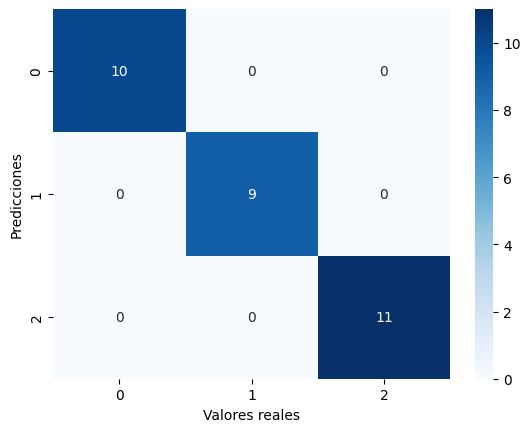

In [360]:
# Compute confussion matrix (normalized confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values, labels=np.unique(y_test))
print("Matriz de confusión:")
print(cm)
# Plot normalized confussion matrix
sns.heatmap(cm,annot = True, cmap = 'Blues')

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

# Final remarks

- Evaluation of classification model is critical

- Train and test set have to be mutually exclusive

- There are several alternatives: Holdout, Montecarlo, k-fold, repeated k-fold, Leave P Out (LPO), Leave One Out (LOO), Stratified k-fold

- https://scikit-learn.org/stable/modules/cross_validation.html

# Activity

1) Compare the accuracy of the classification using (a) the four variables, (b) the two Petal variables, and (c) the two Sepal variables. Which provides the best classification accuracy?


2) Using the four variables, try with two classifiers. Which provides the best performance?

In [361]:
# Con las 4 variables, usando el 80% de los datos para enternar el modelo y con logisticRegression, el accuracy es de 1.0
# classification model using the two Petal variables
X_petal  = dataset[["Petal_Length", "Petal_Width"]].values
y  = dataset["Flower"].values
X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(X_petal, y, test_size=0.3, random_state=42)
modelo_petal = LogisticRegression()
# Fit the model to the training data
modelo_petal.fit(X_petal_train,y_petal_train)

predicted_petal_values = modelo_petal.predict(X_petal_test)
accuracy_petal = accuracy_score(y_petal_test,predicted_petal_values)
print(accuracy_petal)

# classification model using the two Sepal variables
X_sepal  = dataset[["Sepal_Length", "Sepal_Width"]].values
y  = dataset["Flower"].values
X_sepal_train, X_sepal_test, y_sepal_train, y_sepal_test = train_test_split(X_sepal, y, test_size=0.3, random_state=42)
modelo_sepal = LogisticRegression()
# Fit the model to the training data
modelo_sepal.fit(X_sepal_train,y_sepal_train)

predicted_sepal_values = modelo_sepal.predict(X_sepal_test)
accuracy_sepal = accuracy_score(y_sepal_test,predicted_sepal_values)
print(accuracy_sepal)



1.0
0.8222222222222222


In [362]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(accuracy_dt)

1.0
